In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.datasets import make_classification


In [4]:
X,y = make_classification(n_samples=1000, n_features=10,n_classes=2 , random_state=42)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)


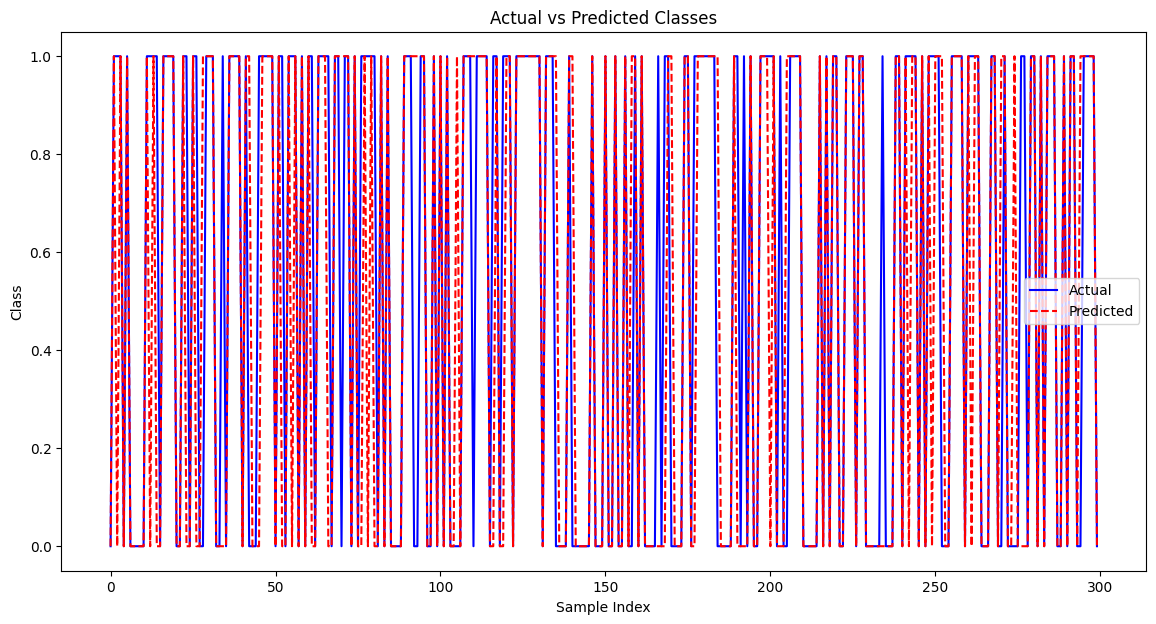

In [9]:

plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8466666666666667
Precision: 0.8888888888888888
Recall: 0.8242424242424242
F1 Score: 0.8553459119496856
Confusion Matrix:
[[118  17]
 [ 29 136]]


In [11]:
model = LogisticRegression()
penalty = ['l1', 'l2','elasticnet']
C_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


In [12]:
params = dict(penalty=penalty, C=C_values, solver=solver)

In [13]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv,n_jobs=-1  , scoring='accuracy')

In [14]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
grid.fit(X_train, y_train)

c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [17]:
grid.best_score_

np.float64(0.8785714285714287)

In [18]:
y_pred =  grid.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8533333333333334
Precision: 0.9230769230769231
Recall: 0.8
F1 Score: 0.8571428571428571
Confusion Matrix:
[[124  11]
 [ 33 132]]


In [20]:
from sklearn.model_selection import RandomizedSearchCV


In [21]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, n_jobs=-1, scoring='accuracy')

In [22]:
randomcv.fit(X_train,y_train)

c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jasje\Desktop\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 119

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [25]:
randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.1}

In [26]:
y_pred = randomcv.predict(X_test)

In [28]:
score = accuracy_score(y_pred,y_test)
score

0.8533333333333334